<a href="https://colab.research.google.com/github/ashish016verma/Assignment/blob/main/ASSIGNMENT_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient_Descent_on_higher_order_polynomial_function


In [2]:
import numpy as np 
import sympy as sym
import matplotlib.pyplot as plt


In [3]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)


In [4]:
X = sym.Symbol("x")

In [5]:
Y=+0.1*X**8-0.2*X**7+0.3*X**6-X**5+X**4-15*X+9*X**3-X**2-10

In [6]:
Y

0.1*x**8 - 0.2*x**7 + 0.3*x**6 - x**5 + x**4 + 9*x**3 - x**2 - 15*x - 10

In [7]:
#Actual Minima

In [8]:
dY = sym.diff(Y)

d2Y = sym.diff(Y)
polyRoots = sym.solveset(Y, X)
dRoots = sym.solveset(dY, X)

d2Roots = sym.solveset(d2Y, X)

In [9]:

dRoots = sym.solveset(sym.diff(Y), X)

dRoots = [root for root in dRoots if root.is_real]

In [10]:
minima = np.array([root for root in dRoots if sym.diff(sym.diff(Y)).evalf(subs={"x": root}) > 0 ])

In [11]:
minima

array([-1.11591693222185, 0.773510942505233], dtype=object)

In [13]:
temp = np.array([(root, Y.evalf(subs={"x":root})) for root in minima])

globalminima = [t[0] for t in temp if t[1] is min(temp[:,1])]

**Plotting the function**

In [14]:
x = np.linspace(-2, 2, 1000)

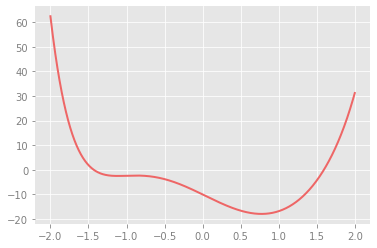

In [15]:
# Plot of the function
plt.plot(x, eval(str(Y)))

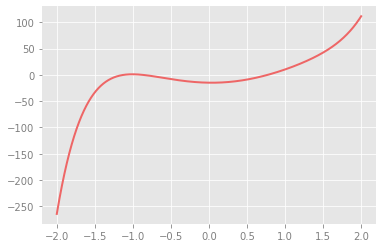

In [16]:
# Plot of its gradient
plt.plot(x, eval(str(sym.diff(Y))))

GRADIENT DESCENT

In [19]:
def gradientDescentSym(Y,point=0, mingrad=0.1, learning_rate=0.1, trace=False, max_iterations=1000):

  if trace:
    tracegrad = []
    tracepoint = [point]
  grad = mingrad

  iteration=0
  while np.abs(grad) >= mingrad and iteration < max_iterations :
    iteration+=1
    grad = sym.diff(Y).evalf(subs={"x":point})
    point -= learning_rate*grad*point
    print(point, grad)
    if trace:
      tracegrad.append(grad)
      tracepoint.append(point)
    
  if trace:
    return tracegrad, tracepoint
  return point

Learning rate = 0.1, mingrad=0.1

In [20]:
grads, points = gradientDescentSym(Y, point=1, trace=True)

-0.0200000000000000 10.2000000000000
-0.0498984656117013 -14.9492328058506
-0.123915381868282 -14.8335054693994
-0.301689734900029 -14.3464314398607
-0.666618503709096 -12.0961612740981
-0.949757965847410 -4.24739878300578
-0.875384691712773 0.783076076316756
-0.879659115954654 -0.0488290951663491


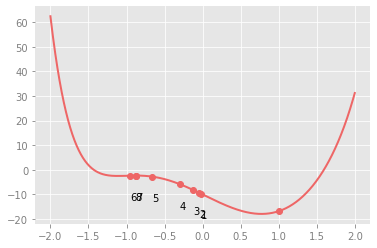

In [21]:
fig, ax = plt.subplots()

ax.plot(x, eval(str(Y)))
pointsY= [Y.evalf(subs={"x":point}) for point in points]
ax.scatter(points, pointsY)

for i, txt in enumerate(points):
    ax.annotate(i, (points[i], pointsY[i]-10))